Using pre trained weights from deepface

In [14]:
import cv2
import matplotlib.pyplot as plt

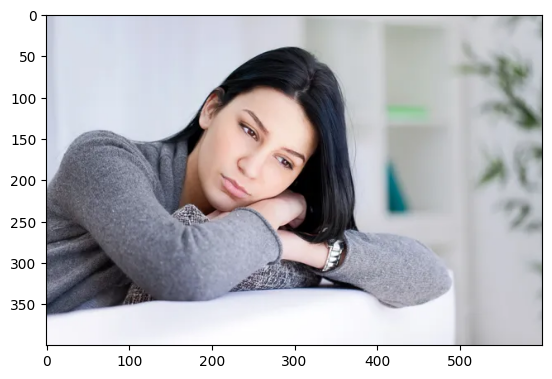

In [15]:
input = cv2.imread('sad_lady.jpg')
plt.imshow(cv2.cvtColor(input, cv2.COLOR_BGR2RGB))

In [16]:
from deepface import DeepFace

In [17]:
# Make sure that silent is set to true, else console will be flooded.
# Enable enforce_detection, this works if no active face is found, else throws some random error.
results = DeepFace.analyze(input, silent=True, enforce_detection=False)

In [18]:
results

[{'emotion': {'angry': 0.5777318496257067,
   'disgust': 0.003233767711208202,
   'fear': 27.114462852478027,
   'happy': 0.12339934473857284,
   'sad': 70.0291395187378,
   'surprise': 2.03928891569376,
   'neutral': 0.11274591088294983},
  'dominant_emotion': 'sad',
  'region': {'x': 0,
   'y': 0,
   'w': 599,
   'h': 399,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0,
  'age': 46,
  'gender': {'Woman': 8.481750637292862, 'Man': 91.51824116706848},
  'dominant_gender': 'Man',
  'race': {'asian': 5.561915412545204,
   'indian': 0.07209802861325443,
   'black': 0.029506831197068095,
   'white': 83.31246376037598,
   'middle eastern': 3.0471857637166977,
   'latino hispanic': 7.976827770471573},
  'dominant_race': 'white'}]

In [19]:
type(results)

list

In [20]:
results[0]['dominant_emotion']

'sad'

In [21]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

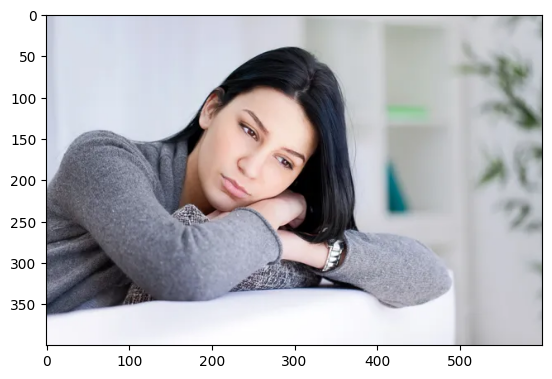

In [22]:
import cv2
gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

input = cv2.imread('sad_lady.jpg')

for(x, y, w, h) in faces:
    cv2.rectangle(input,  (x,y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(input, cv2.COLOR_BGR2RGB))

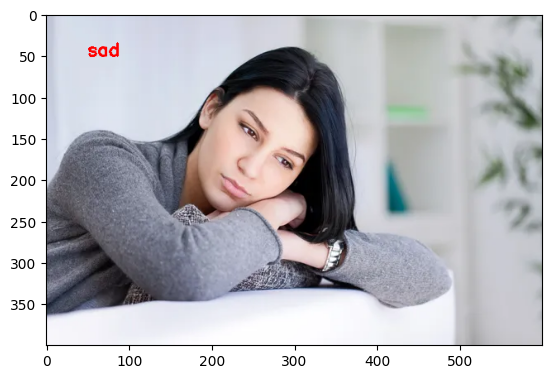

In [23]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(input, 
           predictions[0]['dominant_emotion'],
           (50, 50),
           font, 0.7,
           (0, 0, 255),
           2,
           cv2.LINE_4);

plt.imshow(cv2.cvtColor(input, cv2.COLOR_BGR2RGB))

Video Demo

In [24]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'], silent=True, enforce_detection=False)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, 
           result[0]['dominant_emotion'],
            (50, 50),
           font, 1,
           cv2.LINE_4)
    cv2.imshow('Original Video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()